# A. https://codeforces.com/gym/101964/problem/D

In [ ]:
#include<bits/stdc++.h>
 
using namespace std;
 
#define ll  long long
#define ld  double
 
#define sz(x)   (int)x.size()
#define all(x)  x.begin(),x.end()
 
#define pb  emplace_back
#define X   first
#define Y   second
 
const int   N   = 2005;
 
typedef pair<int,int>   ii;
 
vector<ii>  g[N];
 
int f[N][N];
int s[N];
 
void dfs(int u,int p)   {
    s[u] = 1;
 
    for(ii  e : g[u])   if (e.X != p)   {
        int v = e.X;
        int w = e.Y;
 
        dfs(v,u);
 
        vector<int> cur(s[u] + s[v] + 5,2e9 + 7);
 
        for(int i = 0 ; i <= s[u] ; ++i)
        for(int j = 0 ; j <= s[v] ; ++j)    {
            int nxt = f[u][i] + f[v][j];
 
            if (j & 1)  nxt += w;
            else        nxt += w + w;
 
            if (cur[i + j] > nxt)
                cur[i + j] = nxt;
            if (cur[i + j + 1] > nxt)
                cur[i + j + 1] = nxt;
        }
        s[u] += s[v];
 
        for(int i = 0 ; i <= s[u] ; ++i)
            f[u][i] = cur[i];
    }
}
 
int main()  {
    ios_base::sync_with_stdio(0);
    cin.tie(0); cout.tie(0);
 
    int itest;
    cin >> itest;
 
    while (itest--) {
        int n;  cin >> n;
        int m;  cin >> m;
        int K;  cin >> K;
 
        memset(f,0,sizeof f);
 
        for(int i = 1 ; i <= n ; ++i)   g[i].clear();
        for(int i = 2 ; i <= n ; ++i)   {
            int x;  cin >> x;
            int y;  cin >> y;
            int c;  cin >> c;
 
            g[x].pb(y,c);
            g[y].pb(x,c);
        }
        dfs(1,0);
 
        int ans = 2e9 + 7;
 
        for(int i = 0 ; i <= min(n,m + m) ; i += 2)
            if (ans > f[1][i] + i * K / 2)
                ans = f[1][i] + i * K / 2;
 
        cout << ans << "\n";
    }
}

# B. https://codeforces.com/problemset/problem/1101/G

### Khử gauss:

### Nhận xét:

- 1 đoạn sẽ được biễu diễn bằng 2 chỉ số $[l, r]$
- Tổng xor của các số trong đoạn đó là $s_r \oplus s_{l - 1}$

- S là tổng xor cộng dồn

Các đoạn được chọn trong subset là $[l_1, r_1], [l_2, r_2], ..., [l_k, r_k]$

Tổng xor của các số trong các đoạn trên là:

$$s_{l_1 - 1} \oplus s_{r_1} \oplus s_{l_2 - 1} \oplus s_{r_2} ... \oplus s_{l_k - 1} \oplus s_{r_k}$$

- Những chỉ số nào bị trùng nhau thì sẽ bị triệt tiêu:
- Những chỉ số còn lại sẽ là subset của tập {0, 1, 2, ..., n}

Giả sử các đoạn được chia ra bởi các chỉ số $[1, x_1], [x_1 + 1, x_2], ..., [x_{k - 1} + 1, x_k = n]$

Nếu tồn tại 1 subset các đoạn có tổng xor bằng 0 thì tồn tại 1 subset của tập ${s_0, s_{x_1}, s_{x_2}, ..., s_{x_k = n}}$ có tổng xor bằng 0

Tìm tập trên bằng xor basis (ứng dụng của <b>KHỬ GAUSS</b>). Đáp án là size của BASIS

https://codeforces.com/contest/1101/submission/69466511

# C. https://codeforces.com/problemset/problem/959/F

Thêm từng số vào basis xem:
- Nếu không tồn tại 1 subset các số trong basis có tổng xor bằng số này, thì add vào basis.
- Nếu có, thì thôi.

- Nếu tồn tại subset trong basis có tổng xor bằng x, thì tập đấy là subset duy nhất có tổng xor bằng x (trong basis)

### Cách làm:
- Xét l tăng dần, thêm dần các số $a_i$ vào basis.
- Xét xem có tồn tại subset của basis sao cho tổng xor bằng x hay không.
    * Nếu không, thì đáp án cho truy vấn này là 0.
    * Nếu có, thì chọn 1 subset của các số trong l số đầu (nằm ngoài basis) thì tổng của các số này cũng có duy nhất 1 subset trong basis có tổng bằng nó.
    * Chọn subset này trong basis để triệt tiêu các số nằm ngoài
    * Chọn subset có tổng xor bằng x để tổng xor bằng x.
    
    $$2^{l - sz(basis)}$$

https://codeforces.com/contest/959/submission/123231403

# D. https://atcoder.jp/contests/arc101/tasks/arc101_d?lang=en

### Nhận xét:
- Những robot nằm hẳn về bên trái hoặc hẳn về bên phải của các lỗ thì có thể bỏ qua
- Với mỗi robot có lỗ ở 2 bên để chui xuống, gọi:
    * $a_i$ là khoảng cách từ robot tới lỗ trái gần nhất
    * $b_i$ là khoảng cách từ robot tới lỗ phải gần nhất

Đặt:
- x là số đơn vị dịch về bên trái nhiều nhất (trong tất cả các lần dịch trước đó, ban đầu là 0)
- y là số đơn vị dịch về bên phải nhiều nhất (trong tất cả các lần dịch trước đó, ban đầu là 0)

x = -min toạ độ trong quá trình dịch chuyển robot
y =  max toạ độ trong quá trình dịch chuyển robot

Nhận xét:
- Từ điểm $(x, y)$ có thể đi tới điểm $(x + 1, y)$ hoặc $(x, y + 1)$

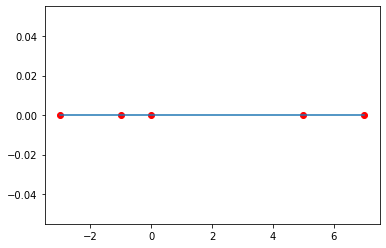

In [3]:
import matplotlib.pyplot as plt


x = [-3, -1, 0, 5, 7]
y = [0 for v in x]

plt.plot(x, y, 'ro')
plt.plot(x, y)

- Nếu $x = a_i$ thì robot sẽ rơi vào lỗ bên trái
- Nếu $y = b_i$ thì robot sẽ rơi vào lỗ bên phải



Như vậy, ta sẽ nghĩ tới ý tưởng:

- Tại vị trí (x, y) trên gốc toạ độ, đếm xem có bao nhiêu trạng thái mà các điểm $(a_i, b_i)$ thoả mãn:
    * $a_i \leq x$
    * $b_i \leq y$
    
    sẽ gặp trường hợp $x' = a_i$ hay $y' = b_i$ trước ($x', y')$ là toạ độ trong tất cả các bước dịch chuyển trước đó

Ta chỉ quan tâm các điểm thoả mãn 2 điều kiện trên do những điểm không thoả mãn điểu kiện trên: (tức là 1 trong 2 TH sau)
- $a_i > x, b_i \leq y$
- $a_i \leq x, b_i > y$

đều đã xác định được lỗ mà con robot đó sẽ rơi rồi (do TH $x = a_i$ hay $y = b_i$ đã được xác định cái nào xảy ra trước)

Hic khó nói quá, chắc để đến đây mọi người cố đọc code để hiểu nốt nhớ:

https://atcoder.jp/contests/arc101/submissions/10933073